In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
from root_pandas import read_root
from glob import glob
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
##MCC9 BEAM ON DATA

SEL = 'Vertex_x != -9999.'
START = 0
STOP = 10000000

myfile_beam_on= '/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_hadd.root'
df_Event_beam_on = pd.DataFrame( root2array( myfile_beam_on,'/gammacorrelation/Event_Correlationtree',\
                                            selection=SEL, start=START,stop=STOP ) )
df_Sps_beam_on = pd.DataFrame( root2array( myfile_beam_on,'/gammacorrelation/Sps_Correlationtree',\
                                          selection=SEL, start=START, stop=STOP ) )

nON2  = len(df_Event_beam_on)
weightsON2  = np.ones(nON2)  * 1

print df_Event_beam_on.shape[0]
print df_Sps_beam_on.shape[0]

55645
1914988


In [4]:
# merge data frames
df_Sps_beamon_full = pd.merge(df_Sps_beam_on,df_Event_beam_on,how='inner',on=['Vertex_x','Vertex_y','Vertex_z'])

In [5]:
df_Sps_beamon_full.head()

,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,Vertex_y,...,sps_cluster_charge10,sps_cluster_charge20,sps_cluster_charge50,neutrinos_y,neutrinoshowers_y,neutrinotracks_y,muon_px_y,muon_py_y,muon_pz_y,maxTrkLen_y
0,2.264478,-67.186203,32.864933,439.069097,95.774017,1713,5136,34,238.181244,73.872002,...,4231.018555,4231.018555,4231.018555,1,0,3,-0.019867,-0.48527,0.874138,73.337265
1,109.964249,58.560688,47.400002,352.362960,39.913307,1713,5136,34,238.181244,73.872002,...,4231.018555,4231.018555,4231.018555,1,0,3,-0.019867,-0.48527,0.874138,73.337265
2,177.043701,-115.164009,199.500000,265.255490,30.429939,1713,5136,34,238.181244,73.872002,...,4231.018555,4231.018555,4231.018555,1,0,3,-0.019867,-0.48527,0.874138,73.337265
3,66.104813,-82.255043,206.100006,287.398108,41.048409,1713,5136,34,238.181244,73.872002,...,4231.018555,4231.018555,4231.018555,1,0,3,-0.019867,-0.48527,0.874138,73.337265
4,62.710690,-84.939720,211.964066,287.529781,89.103729,1713,5136,34,238.181244,73.872002,...,4231.018555,4231.018555,4231.018555,1,0,3,-0.019867,-0.48527,0.874138,73.337265


In [6]:
##MCC9 BEAM OFF DATA


myfile_beam_off= '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_hadd.root'
df_Event_beam_off = pd.DataFrame( root2array( myfile_beam_off,'/gammacorrelation/Event_Correlationtree',\
                                            selection=SEL, start=START,stop=STOP ) )
df_Sps_beam_off = pd.DataFrame( root2array( myfile_beam_off,'/gammacorrelation/Sps_Correlationtree',\
                                          selection=SEL, start=START, stop=STOP ) )
print df_Event_beam_off.shape[0]
print df_Sps_beam_off.shape[0]

182629
2708370


In [7]:
# merge data frames
df_Sps_beamoff_full = pd.merge(df_Sps_beam_off,df_Event_beam_off,how='inner',on=['Vertex_x','Vertex_y','Vertex_z'])

In [8]:
df_Sps_beamoff_full.head()

,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,Vertex_y,...,sps_cluster_charge10,sps_cluster_charge20,sps_cluster_charge50,neutrinos_y,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen
0,128.264023,-24.317942,1.234173,792.229879,683.787598,3035,5499,60,204.329391,-2.045411,...,0.0,0.0,0.0,1,0,2,0.201583,0.96731,0.153869,100.796036
1,238.956604,-49.346077,15.900000,775.807213,69.399155,3035,5499,60,204.329391,-2.045411,...,0.0,0.0,0.0,1,0,2,0.201583,0.96731,0.153869,100.796036
2,237.036041,-103.212852,29.258354,767.629921,404.727325,3035,5499,60,204.329391,-2.045411,...,0.0,0.0,0.0,1,0,2,0.201583,0.96731,0.153869,100.796036
3,209.458603,-91.001900,84.300003,710.796410,46.077759,3035,5499,60,204.329391,-2.045411,...,0.0,0.0,0.0,1,0,2,0.201583,0.96731,0.153869,100.796036
4,139.922211,110.955223,106.500000,695.263862,44.279247,3035,5499,60,204.329391,-2.045411,...,0.0,0.0,0.0,1,0,2,0.201583,0.96731,0.153869,100.796036


In [9]:
##MCC9 MC

myfile_MC='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_hadd.root'
df_Event_MC = pd.DataFrame( root2array( myfile_MC,'/gammacorrelation/Event_Correlationtree',\
                                            selection=SEL, start=START,stop=STOP ) )
df_Sps_MC = pd.DataFrame( root2array( myfile_MC,'/gammacorrelation/Sps_Correlationtree',\
                                          selection=SEL, start=START, stop=STOP ) )
print df_Event_MC.shape[0]
print df_Sps_MC.shape[0]
df_POT_MC = pd.DataFrame( root2array( myfile_MC,'/gammacorrelation/potTree' ) )

364186
5068121


In [10]:
df_Sps_MC_full = pd.merge(df_Sps_MC,df_Event_MC,how='inner',on=['Vertex_x','Vertex_y','Vertex_z'])

In [11]:
df_Sps_MC_full.head()

,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,Vertex_y,...,sps_cluster_charge10,sps_cluster_charge20,sps_cluster_charge50,neutrinos_y,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen
0,4.277446,112.773880,12.948044,374.698046,294.908844,1031,6374,20,247.002716,-63.443893,...,6868.736816,6868.736816,6868.736816,1,0,4,-0.629079,0.458358,0.627828,72.181847
1,249.774796,-103.472664,64.743279,177.369928,191.011398,1031,6374,20,247.002716,-63.443893,...,6868.736816,6868.736816,6868.736816,1,0,4,-0.629079,0.458358,0.627828,72.181847
2,135.779816,-90.309074,77.400002,196.797150,38.190308,1031,6374,20,247.002716,-63.443893,...,6868.736816,6868.736816,6868.736816,1,0,4,-0.629079,0.458358,0.627828,72.181847
3,153.181778,-0.675448,82.096832,192.086142,126.470917,1031,6374,20,247.002716,-63.443893,...,6868.736816,6868.736816,6868.736816,1,0,4,-0.629079,0.458358,0.627828,72.181847
4,165.916779,19.762751,80.400002,195.405811,63.689960,1031,6374,20,247.002716,-63.443893,...,6868.736816,6868.736816,6868.736816,1,0,4,-0.629079,0.458358,0.627828,72.181847


In [12]:
df_POT_MC.head()

,sr_pot,sr_run,sr_sub_run
0,1.860528e+15,5051,15
1,3.005402e+15,6374,20
2,9.929284e+15,6663,124
3,9.258564e+15,6663,125
4,9.148969e+15,6663,126


In [13]:
print(len(df_Event_MC))

364186


In [14]:
POT = np.sum(df_POT_MC['sr_pot'].values)
print POT

8.140207142564643e+20


In [15]:
##MCC9 BEAM OFF DATA VETO REMOVED

myfile_beam_off_rm= '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_csu_run1_reco2_veto_removed_hadd.root'
df_Event_beam_off_rm = pd.DataFrame( root2array( myfile_beam_off_rm,'/gammacorrelation/Event_Correlationtree',\
                                            selection=SEL, start=START,stop=STOP ) )
df_Sps_beam_off_rm = pd.DataFrame( root2array( myfile_beam_off_rm,'/gammacorrelation/Sps_Correlationtree',\
                                          selection=SEL, start=START, stop=STOP ) )
print df_Event_beam_off_rm.shape[0]
print df_Sps_beam_off_rm.shape[0]

2758
88691


In [16]:
df_Sps_beamoff_rm_full = pd.merge(df_Sps_beam_off_rm,df_Event_beam_off_rm,how='inner',on=['Vertex_x','Vertex_y','Vertex_z'])

In [17]:
df_Sps_beamoff_rm_full.head()

,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,Vertex_y,...,N_sps,Event_cluster_charge,distance_smallest_rand_vtx,N_sps10,N_sps20,N_sps50,sps_cluster_charge10,sps_cluster_charge20,sps_cluster_charge50,neutrinos_y
0,128.742325,108.010742,22.384699,146.433483,79.096085,304,5171,6,121.180603,116.806328,...,27,133.020416,91.941969,0,0,0,0.0,0.0,0.0,1
1,141.855301,-115.077408,78.300003,249.615633,204.010910,304,5171,6,121.180603,116.806328,...,27,133.020416,91.941969,0,0,0,0.0,0.0,0.0,1
2,227.967209,-89.616257,113.874031,238.709389,99.233749,304,5171,6,121.180603,116.806328,...,27,133.020416,91.941969,0,0,0,0.0,0.0,0.0,1
3,22.936346,101.688751,129.600006,106.689559,77.557655,304,5171,6,121.180603,116.806328,...,27,133.020416,91.941969,0,0,0,0.0,0.0,0.0,1
4,48.852661,99.004074,129.000000,84.245525,81.147995,304,5171,6,121.180603,116.806328,...,27,133.020416,91.941969,0,0,0,0.0,0.0,0.0,1


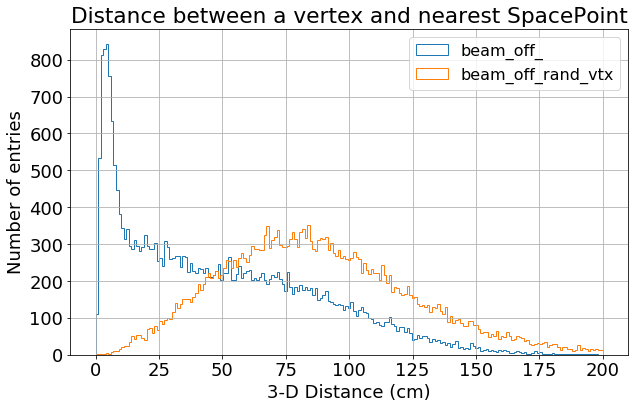

In [18]:
fig = plt.figure(figsize=(10,6))
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]
df_vertex_cut_beam_on_boundary_cut= df_Event_beam_on.query('distance_smallest<1e10 and Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8')
df_vertex_cut_beam_on_no_boundary_cut= df_Event_beam_on.query('distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut= df_Event_beam_off.query('distance_smallest<1e10 and Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8')
df_vertex_cut_beam_off_no_boundary_cut= df_Event_beam_off.query('distance_smallest<1e10')

BINS = np.linspace(0,200,200)

#plt.hist(df_vertex_cut_beam_on_boundary_cut['distance_smallest'].values,bins=BINS,histtype='step',lw=1,label='beam_on_boundary_cut')
#plt.hist(df_vertex_cut_beam_on_no_boundary_cut['distance_smallest'].values,bins=BINS,histtype='step',lw=1,label='beam_on_no_boundary_cut')

plt.hist(df_vertex_cut_beam_off_boundary_cut['distance_smallest'].values,bins=BINS,histtype='step',lw=1,label='beam_off_')
#plt.hist(df_vertex_cut_beam_off_no_boundary_cut['distance_smallest'].values,bins=BINS,histtype='step',lw=1,label='beam_off_no_boundary_cut')

#plt.hist(df_vertex_cut_beam_off['distance_smallest'].values,bins=BINS,histtype='step',lw=1,label='beam_off')
plt.hist(df_vertex_cut_beam_off_boundary_cut['distance_smallest_rand_vtx'].values,bins=BINS,histtype='step',lw=1,label='beam_off_rand_vtx')

plt.legend(loc=1,fontsize=16)

plt.grid()
plt.title("Distance between a vertex and nearest SpacePoint")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')


plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

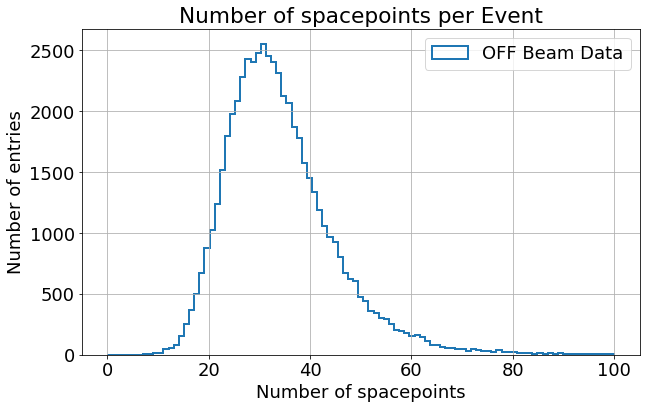

<Figure size 432x288 with 0 Axes>

In [19]:
BINS = np.linspace(0,100,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()
plt.draw()
fig.savefig('N_density', dpi=300)




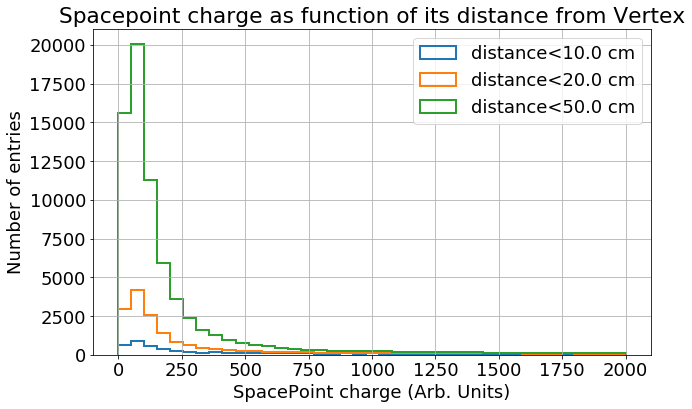

In [20]:
df_distance_Cut10 = df_Sps_beam_on.query('distance<10.0')
df_distance_Cut20 = df_Sps_beam_on.query('distance<20.0')
df_distance_Cut50 = df_Sps_beam_on.query('distance<50.0')
BINS = np.linspace(0,2000,40)
fig = plt.figure(figsize=(10,6))
plt.hist(df_distance_Cut10['sps_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='distance<10.0 cm')
plt.hist(df_distance_Cut20['sps_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='distance<20.0 cm')
plt.hist(df_distance_Cut50['sps_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='distance<50.0 cm')
plt.title("Spacepoint charge as function of its distance from Vertex")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)


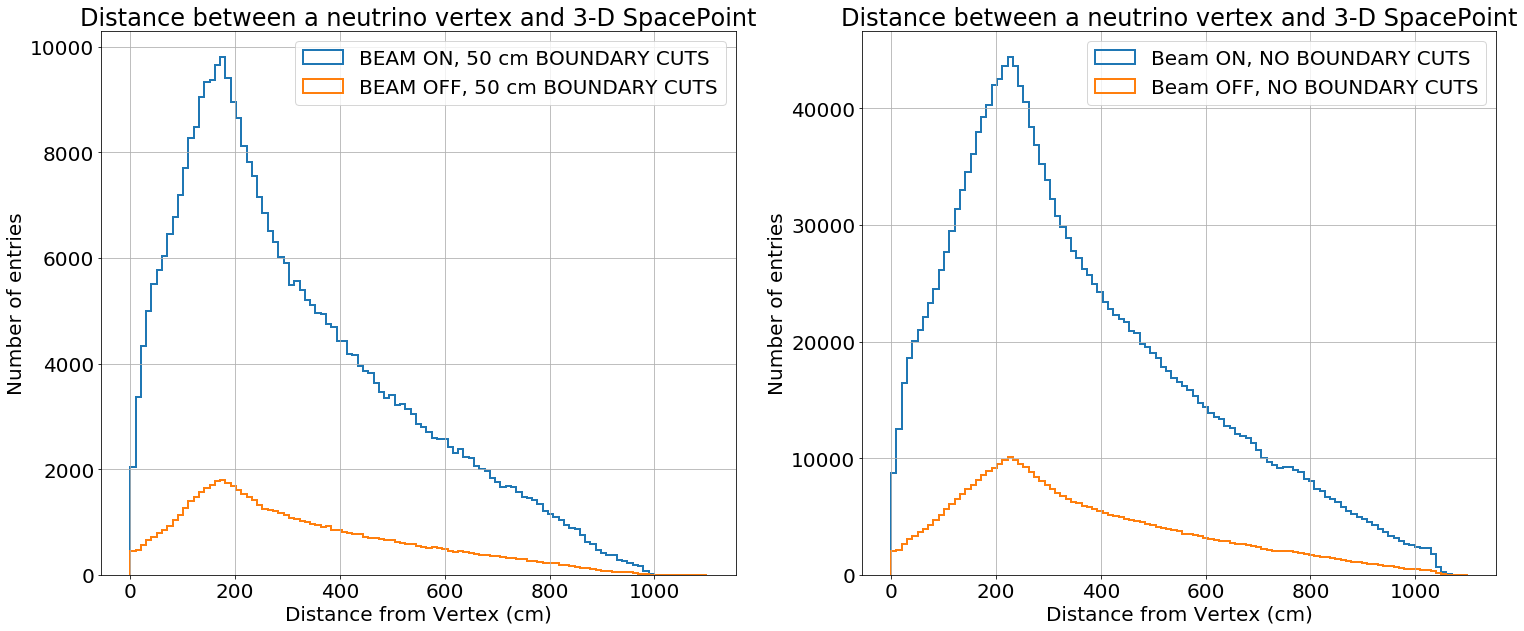

In [21]:
BINS = np.linspace(0,1100,110)
df_vertex_cut_beam_on_boundary_cut50= df_Sps_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8')
df_vertex_cut_beam_off_boundary_cut50= df_Sps_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8')
nOFF1 = len(df_vertex_cut_beam_off_boundary_cut50)
nOFF2 = len(df_Sps_beam_off)

weightsOFF1 = np.ones(nOFF1) * 0.15364724298 # factor needed to scale off-beam to on-beam
weightsOFF2 = np.ones (nOFF2)* 0.15364724298

nON1  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON1  = np.ones(nON1)  * 1


nON2  = len(df_Sps_beam_on)
weightsON2  = np.ones(nON2)  * 1




fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 20})
plt.subplot(1, 2, 1)
plt.hist(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM ON, 50 cm BOUNDARY CUTS',weights=weightsON1)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['distance'].values,bins=BINS,weights=weightsOFF1,histtype='step',lw=2,label='BEAM OFF, 50 cm BOUNDARY CUTS')

plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.xlabel('Distance from Vertex (cm)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='Beam ON, NO BOUNDARY CUTS',weights=weightsON2)
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='Beam OFF, NO BOUNDARY CUTS',weights=weightsOFF2)
plt.legend(loc=1)
plt.xlabel('Distance from Vertex (cm)')
plt.ylabel('Number of entries')
plt.grid()
plt.show()


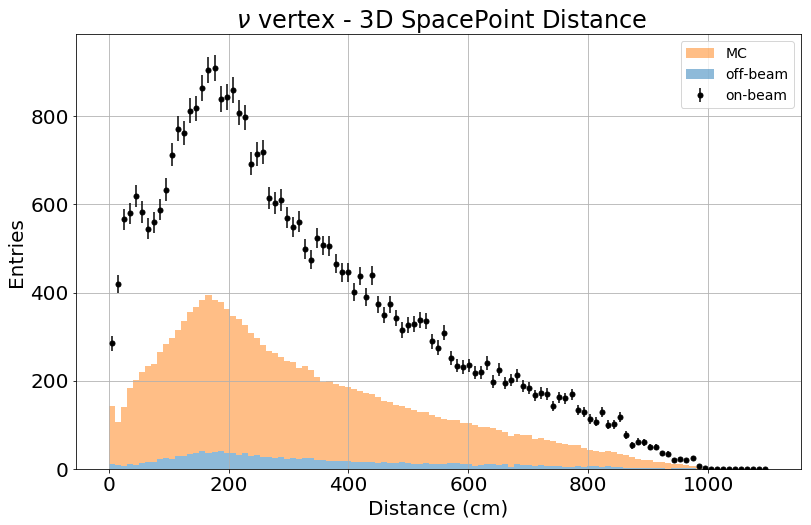

In [25]:
BINS = np.linspace(0,1100,110)
df_vertex_cut_beam_on_boundary_cut50= df_Sps_beamon_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers_y==0 and muon_pz_y>0.8 and neutrinotracks_y>1')
df_vertex_cut_beam_off_boundary_cut50= df_Sps_beamoff_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_MC_boundary_cut50= df_Sps_MC_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')

nOFF = len(df_vertex_cut_beam_off_boundary_cut50)
weightsOFF = np.ones(nOFF) * 0.15364724298 # factor needed to scale off-beam to on-beam

nMC = len(df_vertex_cut_MC_boundary_cut50)
weightsMC = np.ones(nMC) * 0.05193541129 # factor needed to scale MC to on-beam

nON  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON  = np.ones(nON)  * 1

WEIGHTS = [weightsOFF,weightsMC]
fig = plt.figure(figsize=(13,8))
#plt.rcParams.update({'font.size': 18})

xstacked = [df_vertex_cut_beam_off_boundary_cut50['distance'].values,df_vertex_cut_MC_boundary_cut50['distance'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['distance'].values,weights=weightsON,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=1,fontsize=14)
plt.show()




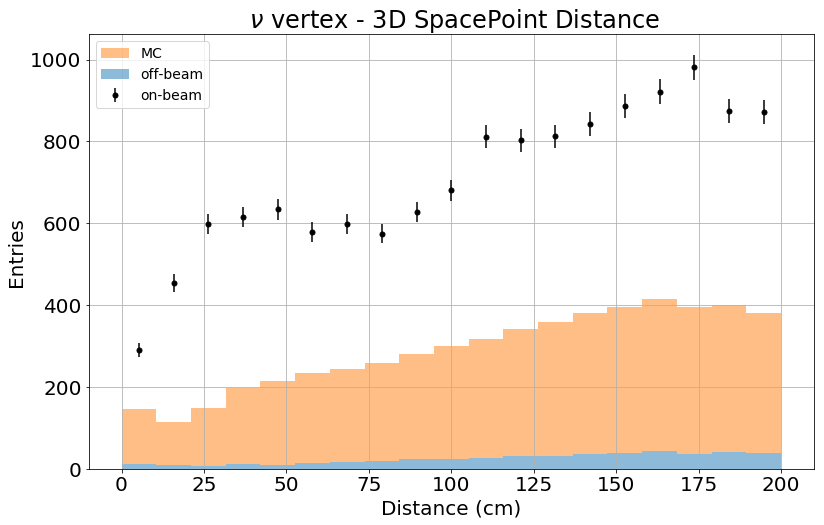

In [26]:
BINS = np.linspace(0,200,20)

nOFF = len(df_vertex_cut_beam_off_boundary_cut50)
weightsOFF = np.ones(nOFF) * 0.15364724298 # factor needed to scale off-beam to on-beam

nMC = len(df_vertex_cut_MC_boundary_cut50)
weightsMC = np.ones(nMC) * 0.05193541129 # factor needed to scale MC to on-beam

nON  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON  = np.ones(nON)  * 1

WEIGHTS = [weightsOFF,weightsMC]
fig = plt.figure(figsize=(13,8))
#plt.rcParams.update({'font.size': 18})

xstacked = [df_vertex_cut_beam_off_boundary_cut50['distance'].values,df_vertex_cut_MC_boundary_cut50['distance'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
#plt.draw()
#fig.savefig('distance', dpi=400)


743168


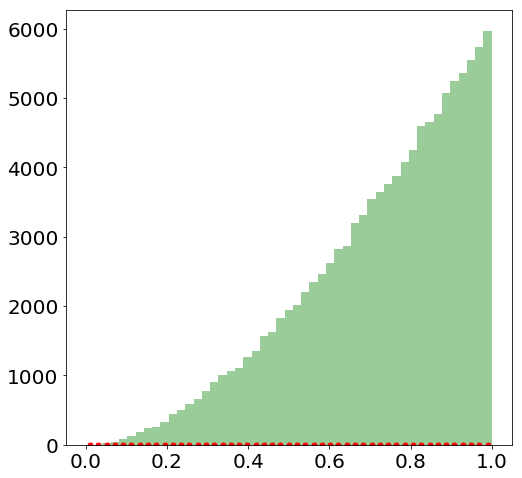

In [27]:
BINS = np.linspace(0,1.,50)
df_rand_vertex_cut_beam_off_boundary_cut50= df_Sps_beam_off.query('_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8')
print len(df_rand_vertex_cut_beam_off_boundary_cut50)

fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram(df_Sps_beam_off['distance_rand_vtx'].values/100.,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
NEVTS = 2861.
binv /= NEVTS
errors /= NEVTS
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
plt.hist(df_Sps_beam_off['distance_rand_vtx'].values/(100),bins=BINS,color='g',alpha=0.4)
#plt.yscale('log')
plt.show()


BINWIDTH = binc[1]-binc[0]


In [28]:
def fun(x,c):
    return 4*pi*x*x*c*BINWIDTH
f2 = np.vectorize(fun)
fun(1.,1)

0.25645654315018723

In [29]:
guess = [1.0]

In [30]:
xvals = np.linspace(bine[0],bine[-1],100)

In [31]:
popt,popv = curve_fit(f2,binc,binv,p0=guess)

In [32]:
print popt

[8.93526173]


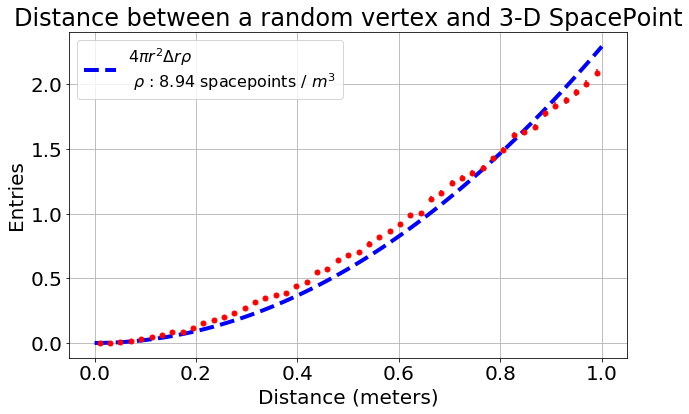

In [33]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,label='$4 \pi r^2 \Delta r \\rho $ \n $\\rho$ : %.02f spacepoints / $m^3$'%(popt[0]))
plt.grid()
plt.xlabel('Distance (meters)')
plt.ylabel('Entries')
plt.title("Distance between a random vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=16)
plt.show()


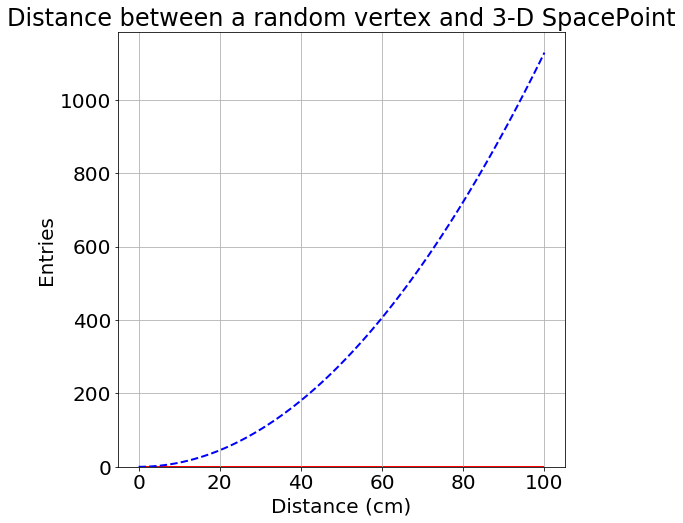

In [34]:
BINS = np.linspace(0,100,10)
df_vertex_cut_beam_off_boundary_cut50= df_Sps_beam_off.query('_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinos==0')


fig = plt.figure(figsize=(8,8))

plt.hist(df_vertex_cut_beam_off_boundary_cut50['distance_rand_vtx'].values,\
        bins=BINS,histtype='step',lw=2,color='r')
xvals = np.linspace(0,100,100)
C = 0.00898
plt.plot(xvals,4*pi*(xvals**2)*C,'b--',lw=2)
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title("Distance between a random vertex and 3-D SpacePoint")
plt.show()


In [35]:
BINS = np.linspace(0,50,50)
df_vertex_cut_beam_on_boundary_cut50= df_Sps_beamon_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_beam_off_boundary_cut50= df_Sps_beamoff_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_MC_boundary_cut50= df_Sps_MC_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')

POWER = 0

nOFF = len(df_vertex_cut_beam_off_boundary_cut50)
dfOFF_r_v = df_vertex_cut_beam_off_boundary_cut50['distance'].values
weightsOFF = np.ones(nOFF) * 0.15364724298 # factor needed to scale off-beam to on-beam
weightsOFF_rweighted = weightsOFF
for i in xrange(len(weightsOFF)):
    weightsOFF_rweighted[i] /= (4*np.pi*(dfOFF_r_v[i]**POWER))

nMC = len(df_vertex_cut_MC_boundary_cut50)
dfMC_r_v = df_vertex_cut_MC_boundary_cut50['distance'].values
weightsMC = np.ones(nMC) * 0.05193541129 # factor needed to scale MC to on-beam
weightsMC_rweighted = weightsMC
for i in xrange(len(weightsMC)):
    weightsMC_rweighted[i] /= (4*np.pi*(dfMC_r_v[i]**POWER))

nON  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON  = np.ones(nON)  * 1



WEIGHTS = [weightsOFF,weightsMC]
fig = plt.figure(figsize=(8,8))

bins=BINS
xstacked = [df_vertex_cut_beam_off_boundary_cut50['distance'].values,df_vertex_cut_MC_boundary_cut50['distance'].values]
LABELS = ['off-beam','MC']

fig = plt.figure(figsize=(6,6))
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
for i,r in enumerate(binc):
    vals_rweighted[i] /= (4*np.pi*(r**POWER))
    errs_rweighted[i] /= (4*np.pi*(r**POWER))
plt.errorbar(binc,vals_rweighted,yerr=errs_rweighted,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.legend(loc=1,fontsize=14)
#plt.yscale('log')
#vol_frac_stacked    
#plt.hist(vol_frac_stacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
plt.show()

UndefinedVariableError: name 'neutrinoshowers' is not defined

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


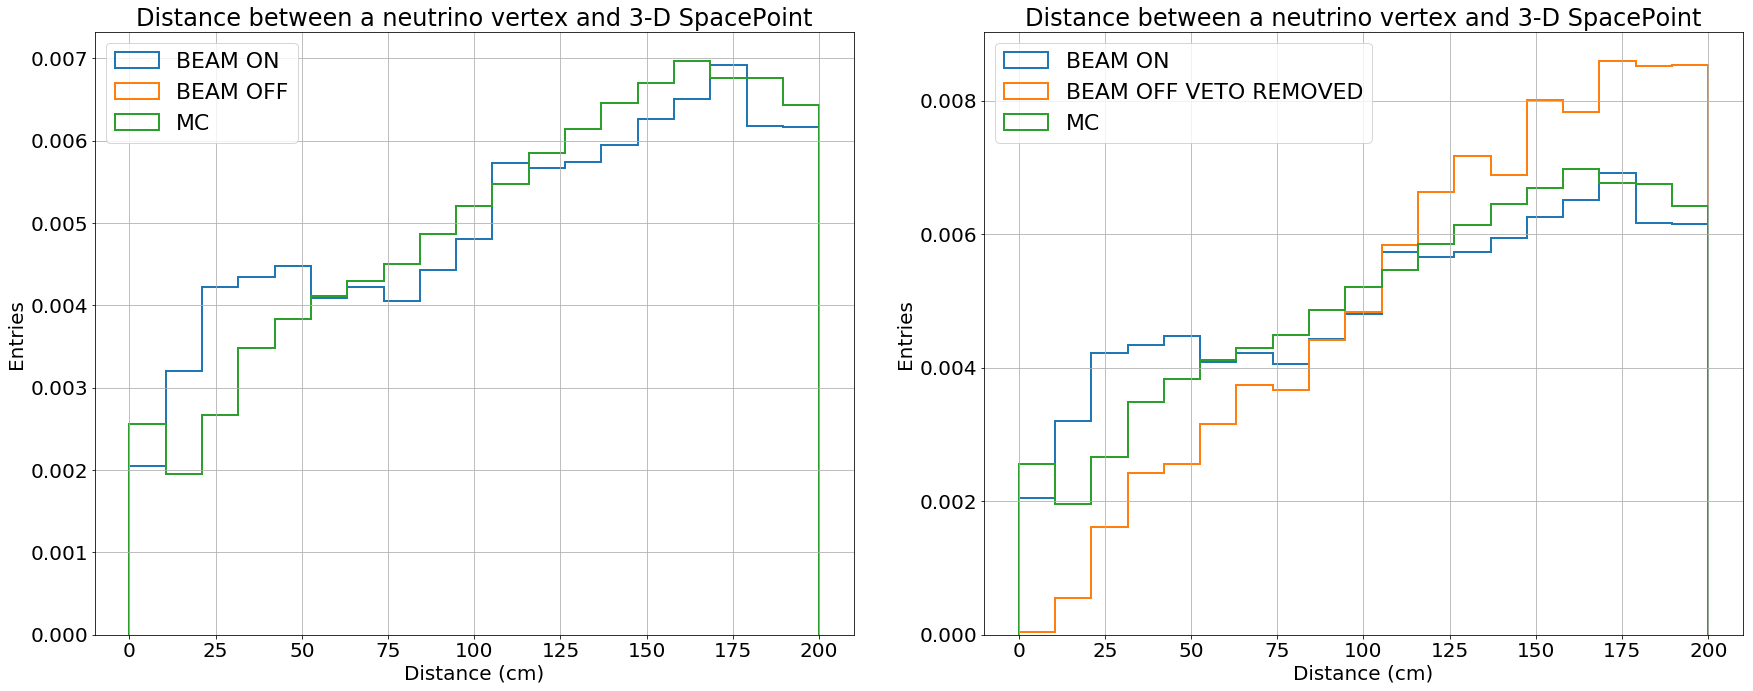

In [36]:
BINS = np.linspace(0,200,20)

df_vertex_cut_beam_off_rm_boundary_cut50= df_Sps_beamoff_rm_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8')

fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.rcParams.update({'font.size': 20})
plt.hist(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM ON',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM OFF',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=22)

plt.subplot(1, 2, 2)
plt.hist(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM ON',density=True)
plt.hist(df_vertex_cut_beam_off_rm_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM OFF VETO REMOVED',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=22)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show>

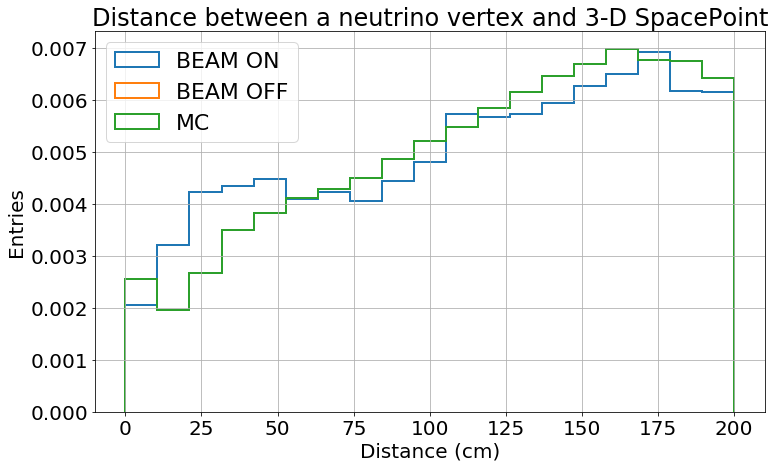

In [37]:
BINS = np.linspace(0,200,20)

fig = plt.figure(figsize=(12,7))


plt.rcParams.update({'font.size': 20})
plt.hist(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM ON',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM OFF',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=22)
plt.show
#plt.draw()
#fig.savefig('distance_mc_on_off', dpi=500)

on beam : 1013
off-beam : 641
MC :  19189


<function matplotlib.pyplot.show>

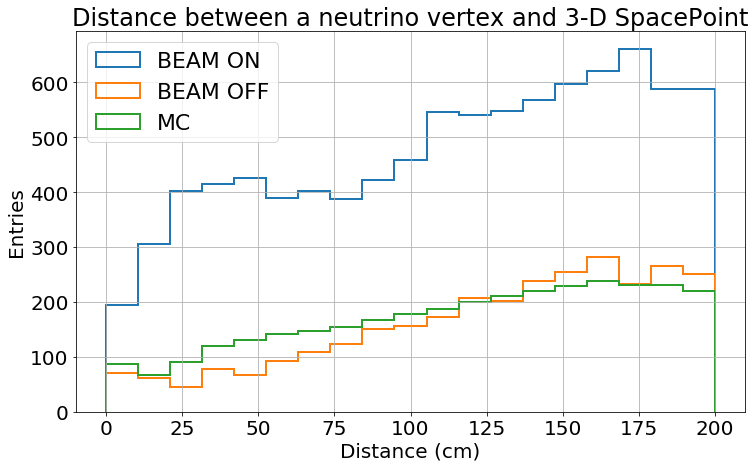

In [39]:
BINS = np.linspace(0,200,20)
df_vertex_cut_beam_on_boundary_cut50= df_Sps_beamon_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers_y==0 and muon_pz_y>0.8 and neutrinotracks_y>1')
df_vertex_cut_beam_off_boundary_cut50= df_Sps_beamoff_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_MC_boundary_cut50= df_Sps_MC_full.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')

df_vertex_cut_beam_on_boundary_cut50_event= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
print 'on beam :', df_vertex_cut_beam_on_boundary_cut50_event.shape[0]
#953

df_vertex_cut_beam_off_boundary_cut50_event= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
print 'off-beam :', df_vertex_cut_beam_off_boundary_cut50_event.shape[0]
#641

df_vertex_cut_MC_boundary_cut50_event= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
print 'MC : ',df_vertex_cut_MC_boundary_cut50_event.shape[0]
#19189

#weights = np.ones( len(df['variable'].values) )

nOFF = len(df_vertex_cut_beam_off_boundary_cut50['distance'].values)


nMC = len(df_vertex_cut_MC_boundary_cut50['distance'].values)

nON  = len(df_vertex_cut_beam_on_boundary_cut50['distance'].values)

weightsOFF = np.ones(nOFF)*(641./641) # factor needed to scale off-beam to on-beam
weightsMC = np.ones(nMC)*(641./19189)  # factor needed to scale MC to on-beam
weightsON  = np.ones(nON)*(641./953)
#WEIGHTS = [weightsOFF,weightsMC]

fig = plt.figure(figsize=(12,7))


plt.rcParams.update({'font.size': 20})
plt.hist(df_vertex_cut_beam_on_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM ON',weights=weightsON)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='BEAM OFF',weights=weightsOFF)
plt.hist(df_vertex_cut_MC_boundary_cut50['distance'].values,bins=BINS,histtype='step',lw=2,label='MC',weights=weightsMC)
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title("Distance between a neutrino vertex and 3-D SpacePoint")
plt.legend(loc=2,fontsize=22)
plt.show

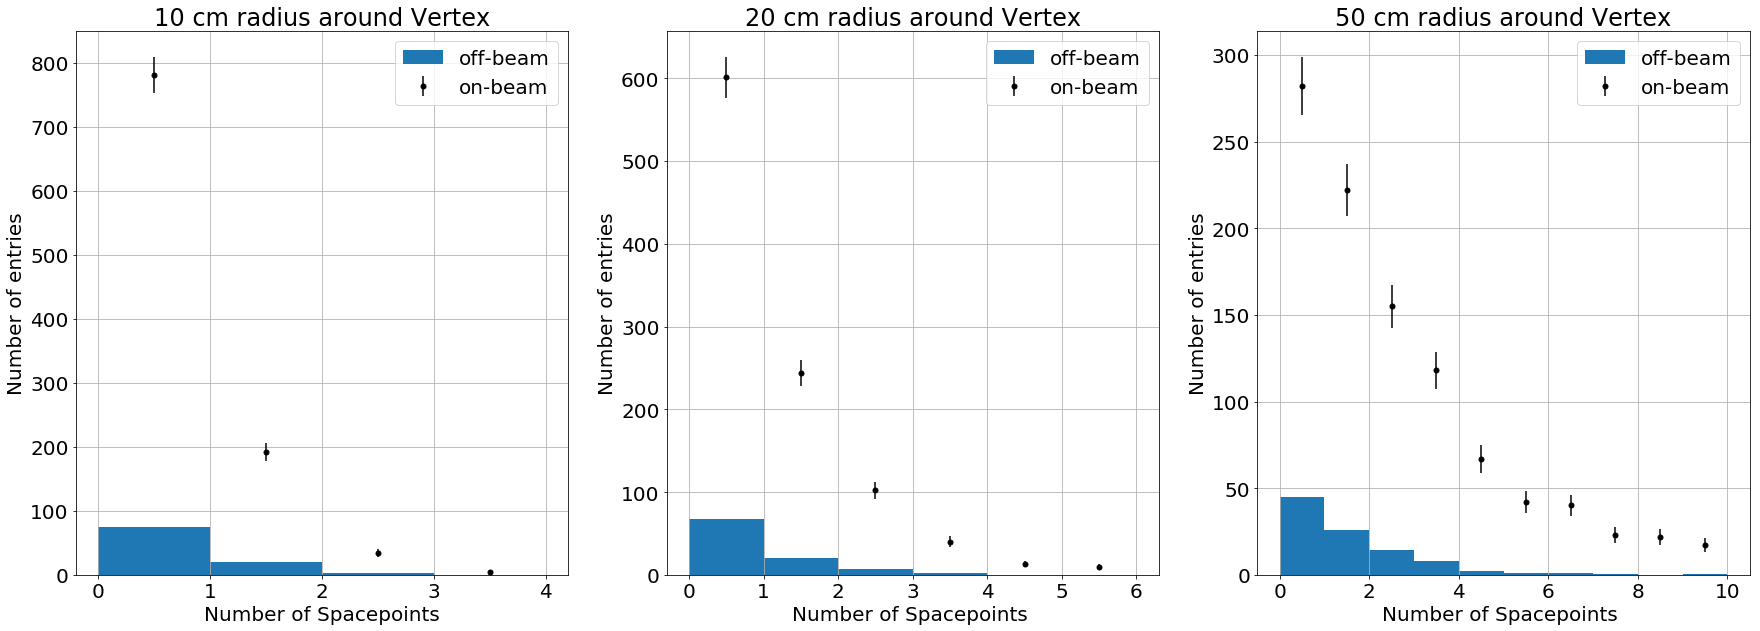

In [41]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')




nOFF = len(df_vertex_cut_beam_off_boundary_cut50)
weightsOFF = np.ones(nOFF) * 0.15364724298 # factor needed to scale off-beam to on-beam
nON  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON  = np.ones(nON)  * 1

nMC = len(df_vertex_cut_MC_boundary_cut50)
weightsMC = np.ones(nMC) * 0.05193541129 # factor needed to scale MC to on-beam
#WEIGHTS = [weightsOFF,weightsMC]
WEIGHTS = [weightsOFF]
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,4,5)
#xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps10'].values,df_vertex_cut_MC_boundary_cut50['N_sps10'].values]
xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps10'].values]

#LABELS = ['off-beam','MC']
LABELS = ['off-beam']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True)

vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 3, 2)
BINS = np.linspace(0,6,7)
#xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps20'].values,df_vertex_cut_MC_boundary_cut50['N_sps10'].values]
xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps20'].values]

#LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 3, 3)
BINS = np.linspace(0,10,11)
#xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps50'].values,df_vertex_cut_MC_boundary_cut50['N_sps10'].values]
xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps50'].values]

#LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()


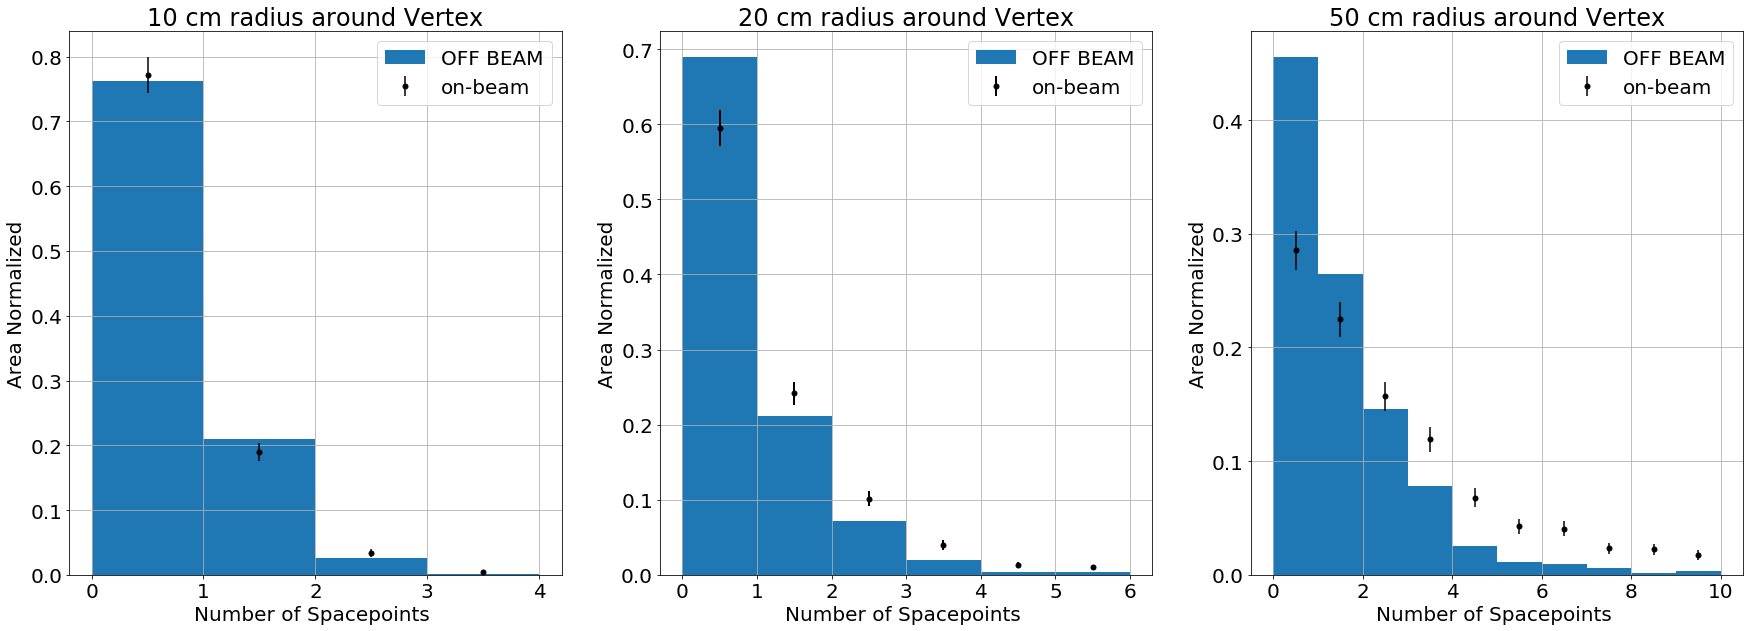

In [42]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1')

fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,4,5)

plt.hist(df_vertex_cut_beam_off_boundary_cut50['N_sps10'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM',lw=2,density=True)
#plt.hist(df_vertex_cut_beam_on_boundary_cut50['N_sps10'].values,bins=BINS,histtype='step',label='ON BEAM',density=True,lw=2)
#plt.hist(df_vertex_cut_MC_boundary_cut50['N_sps10'].values,bins=BINS,histtype='step',label='MC',density=True,lw=2)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='on-beam')

plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 3, 2)
BINS = np.linspace(0,6,7)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['N_sps20'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM',density=True,lw=2)
#plt.hist(df_vertex_cut_beam_on_boundary_cut50['N_sps20'].values,bins=BINS,histtype='step',label='ON BEAM',density=True,lw=2)
#plt.hist(df_vertex_cut_MC_boundary_cut50['N_sps20'].values,bins=BINS,histtype='step',label='MC',density=True,lw=2)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='on-beam',lw=2)

plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.subplot(1, 3, 3)
BINS = np.linspace(0,10,11)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['N_sps50'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM',lw=2,density=True)
#plt.hist(df_vertex_cut_beam_on_boundary_cut50['N_sps50'].values,bins=BINS,histtype='step',label='ON BEAM',density=True,lw=2)
#plt.hist(df_vertex_cut_MC_boundary_cut50['N_sps50'].values,bins=BINS,histtype='step',label='MC',density=True,lw=2)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='on-beam')

plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()


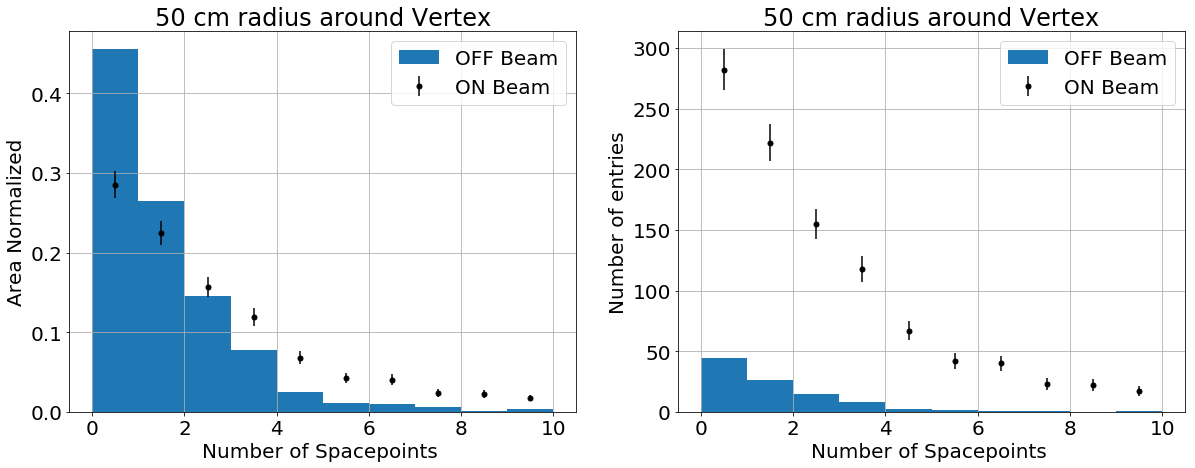

In [43]:
fig = plt.figure(figsize=(20,7))
BINS = np.linspace(0,10,11)
plt.subplot(1, 2, 1)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['N_sps50'].values,bins=BINS,histtype='stepfilled',label='OFF Beam',lw=2,density=True)
#plt.hist(df_vertex_cut_beam_on_boundary_cut50['N_sps50'].values,bins=BINS,histtype='step',label='ON BEAM',density=True,lw=2)
#plt.hist(df_vertex_cut_MC_boundary_cut50['N_sps50'].values,bins=BINS,histtype='step',label='MC',density=True,lw=2)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
binw = (bine[1]-bine[0])
vals = vals.astype(float)
errs = np.sqrt(vals)
vals_rweighted = vals
errs_rweighted = errs
vals_reweighted = vals_rweighted/(binw*(np.sum(vals)))
errs_reweighted = errs_rweighted/(binw*(np.sum(vals)))

plt.errorbar(binc,vals_reweighted,yerr=errs_reweighted,fmt='o',color='k',markersize=5,label='ON Beam')

plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
BINS = np.linspace(0,10,11)
#xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps50'].values,df_vertex_cut_MC_boundary_cut50['N_sps10'].values]
xstacked = [df_vertex_cut_beam_off_boundary_cut50['N_sps50'].values]

#LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',weights=WEIGHTS,stacked=True,label='OFF Beam')
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()
plt.draw()
fig.savefig('distance_50cm', dpi=400)

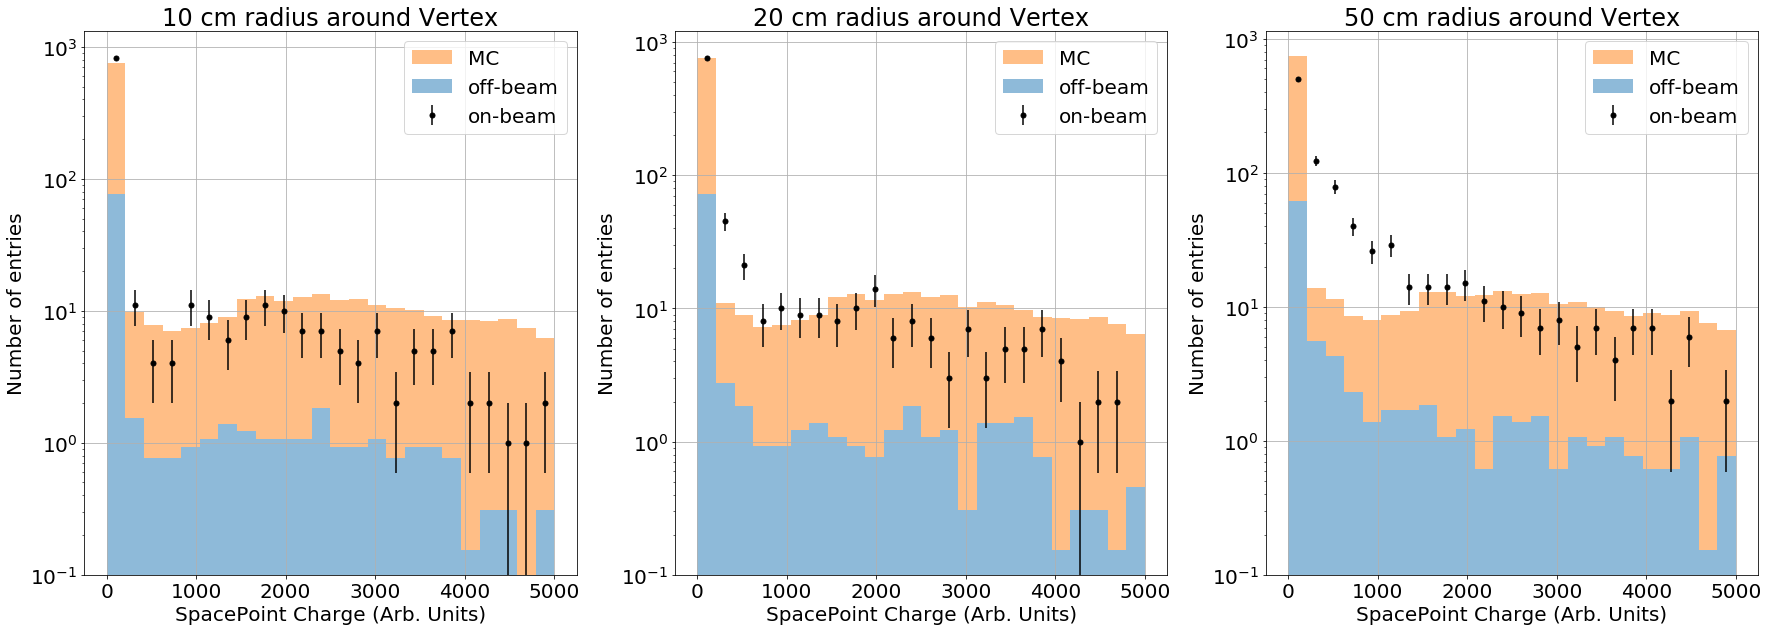

In [44]:

nOFF = len(df_vertex_cut_beam_off_boundary_cut50)
weightsOFF = np.ones(nOFF) * 0.15364724298 # factor needed to scale off-beam to on-beam
nON  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON  = np.ones(nON)  * 1

nMC = len(df_vertex_cut_MC_boundary_cut50)
weightsMC = np.ones(nMC) * 0.05193541129 # factor needed to scale MC to on-beam
WEIGHTS = [weightsOFF,weightsMC]



fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,5000,25)

xstacked = [df_vertex_cut_beam_off_boundary_cut50['sps_cluster_charge10'].values,df_vertex_cut_MC_boundary_cut50['sps_cluster_charge10'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['sps_cluster_charge10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.yscale('log')
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 3, 2)
BINS = np.linspace(0,5000,25)
xstacked = [df_vertex_cut_beam_off_boundary_cut50['sps_cluster_charge20'].values,df_vertex_cut_MC_boundary_cut50['sps_cluster_charge10'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['sps_cluster_charge20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.yscale('log')
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.subplot(1, 3, 3)
BINS = np.linspace(0,5000,25)
xstacked = [df_vertex_cut_beam_off_boundary_cut50['sps_cluster_charge50'].values,df_vertex_cut_MC_boundary_cut50['sps_cluster_charge10'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()


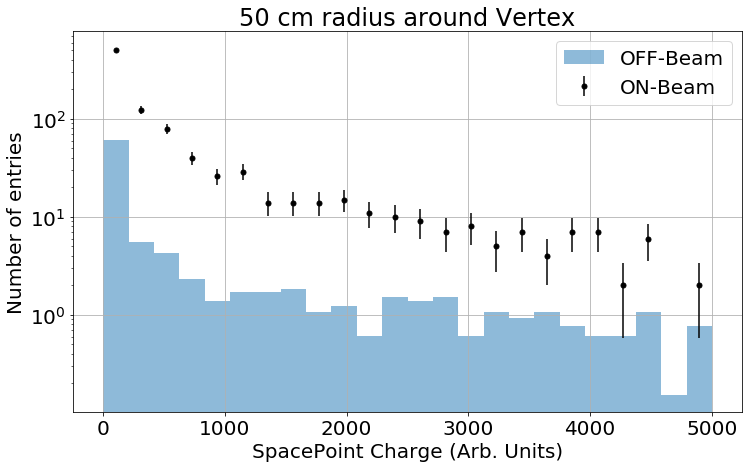

<Figure size 432x288 with 0 Axes>

In [45]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,5000,25)
xstacked = [df_vertex_cut_beam_off_boundary_cut50['sps_cluster_charge50'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label='OFF-Beam',weights=weightsOFF,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON-Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
plt.draw()
fig.savefig('Charge_50cm', dpi=400)

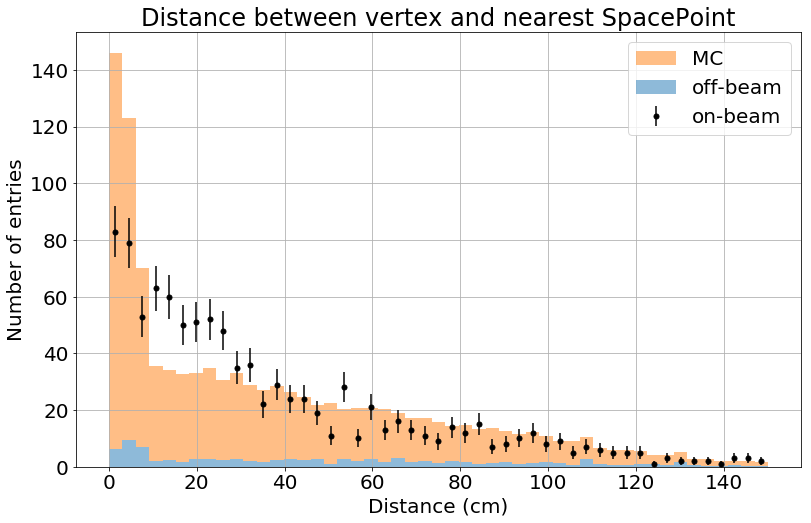

In [46]:


nOFF = len(df_vertex_cut_beam_off_boundary_cut50)
weightsOFF = np.ones(nOFF) * 0.15364724298 # factor needed to scale off-beam to on-beam
nMC = len(df_vertex_cut_MC_boundary_cut50)
weightsMC = np.ones(nMC) * 0.05193541129 # factor needed to scale MC to on-beam
nON  = len(df_vertex_cut_beam_on_boundary_cut50)
weightsON  = np.ones(nON)  * 1
WEIGHTS = [weightsOFF,weightsMC]
BINS = np.linspace(0,150,50)
fig = plt.figure(figsize=(13,8))
xstacked = [df_vertex_cut_beam_off_boundary_cut50['distance_smallest'].values,df_vertex_cut_MC_boundary_cut50['distance_smallest'].values]
LABELS = ['off-beam','MC']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
vals,bine = np.histogram(df_vertex_cut_beam_on_boundary_cut50['distance_smallest'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.title("Distance between vertex and nearest SpacePoint")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()
#plt.yscale('log')
plt.show()

#plt.draw()
#fig.savefig('distance_smallest', dpi=400)

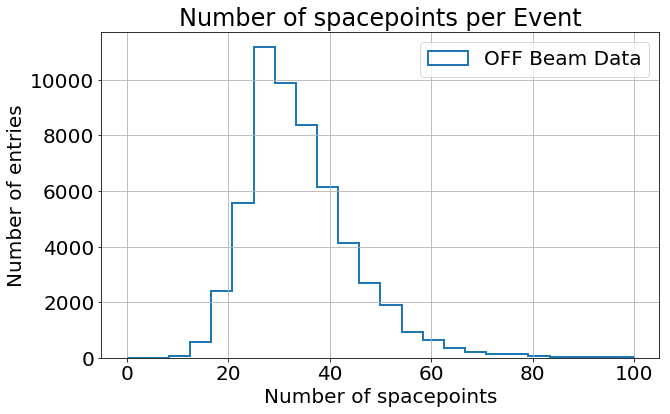

In [47]:
df_distance_Cut5 = df_Event_beam_on.query('distance_smallest<5.0')
df_distance_Cut10 = df_Event_beam_on.query('distance_smallest<10.0')
df_distance_Cut20 = df_Event_beam_on.query('distance_smallest<20.0')
df_distance_Cut100 = df_Event_beam_on.query('distance_smallest<100.0')
#df_rand_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinos==0')
#print len (df_vertex_cut_beam_off_boundary_cut50)
BINS = np.linspace(0,100,25)

fig = plt.figure(figsize=(10,6))
#plt.hist(df_distance_Cut5['N_sps'].values,bins=BINS,histtype='step',lw=2,label='distance_smallest<5.0')
#plt.hist(df_distance_Cut10['N_sps'].values,bins=BINS,histtype='step',lw=2,label='distance_smallest<10.0')
#plt.hist(df_distance_Cut20['N_sps'].values,bins=BINS,histtype='step',lw=2,label='distance_smallest<20.0')
#plt.hist(df_distance_Cut100['N_sps'].values,bins=BINS,histtype='step',lw=2,label='distance_smallest<100.0')
plt.hist(df_Event_beam_on['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()
#plt.draw()
#fig.savefig('N_density', dpi=300)



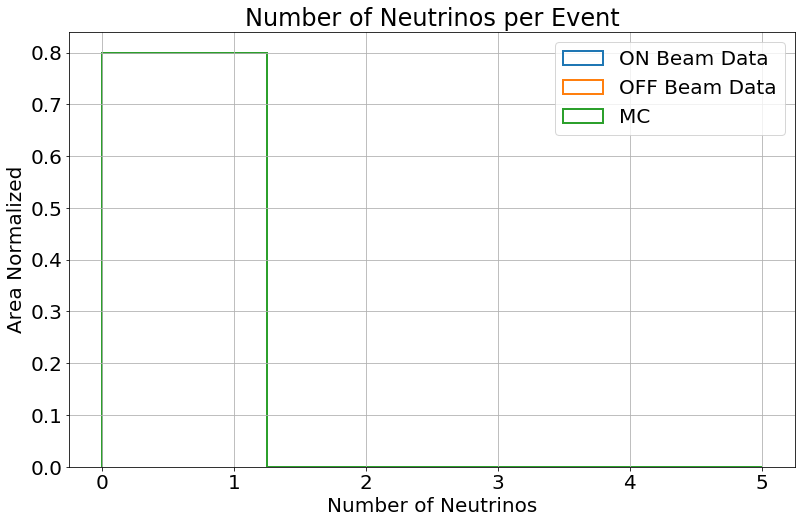

In [48]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,5,5)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Number of Neutrinos per Event")
plt.xlabel('Number of Neutrinos')
plt.ylabel('Area Normalized')
plt.grid()

plt.show()

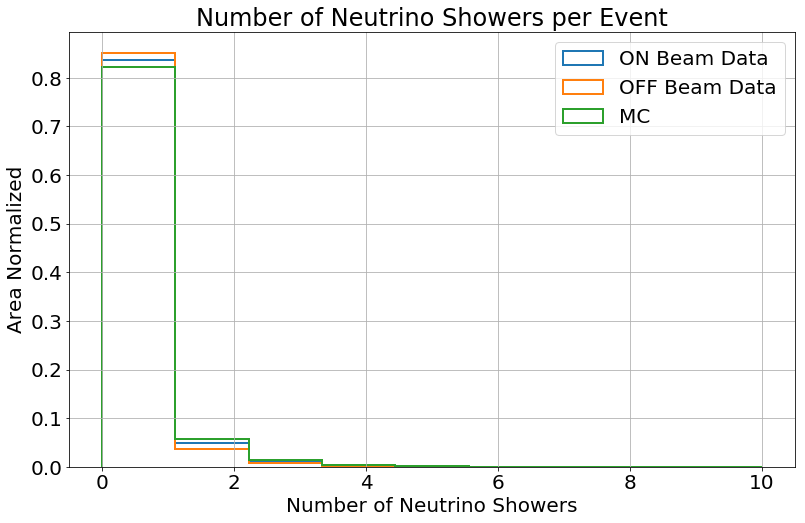

In [49]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,10,10)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Number of Neutrino Showers per Event")
plt.xlabel('Number of Neutrino Showers')
plt.ylabel('Area Normalized')
plt.grid()
plt.show()

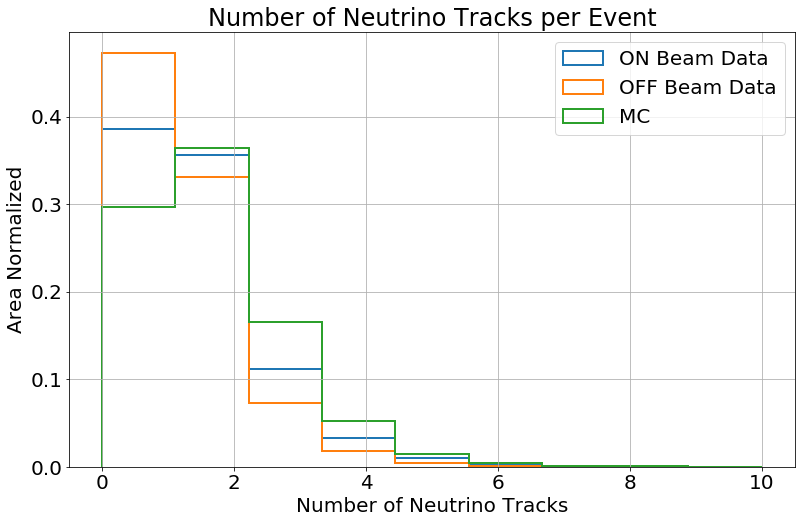

In [50]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,10,10)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Number of Neutrino Tracks per Event")
plt.xlabel('Number of Neutrino Tracks')
plt.ylabel('Area Normalized')
plt.grid()
plt.show()

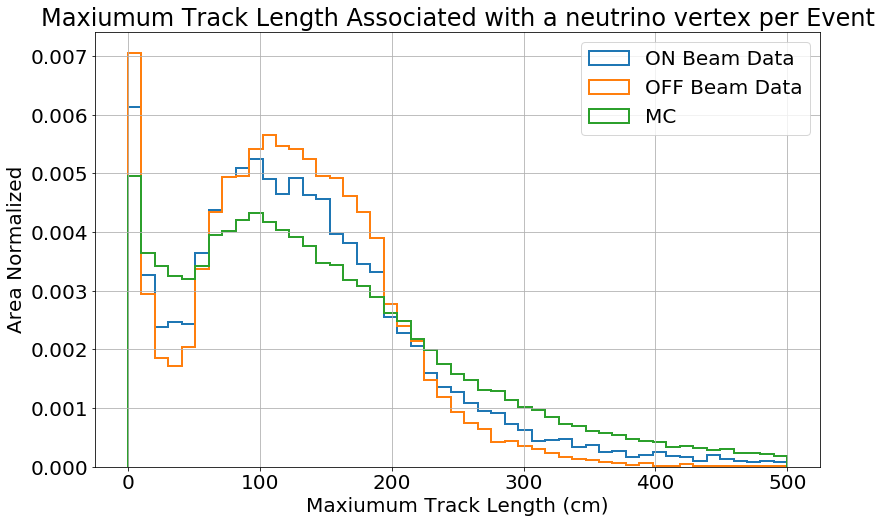

In [51]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,500,50)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Maxiumum Track Length Associated with a neutrino vertex per Event")
plt.xlabel('Maxiumum Track Length (cm)')
plt.ylabel('Area Normalized')
plt.grid()
plt.show()

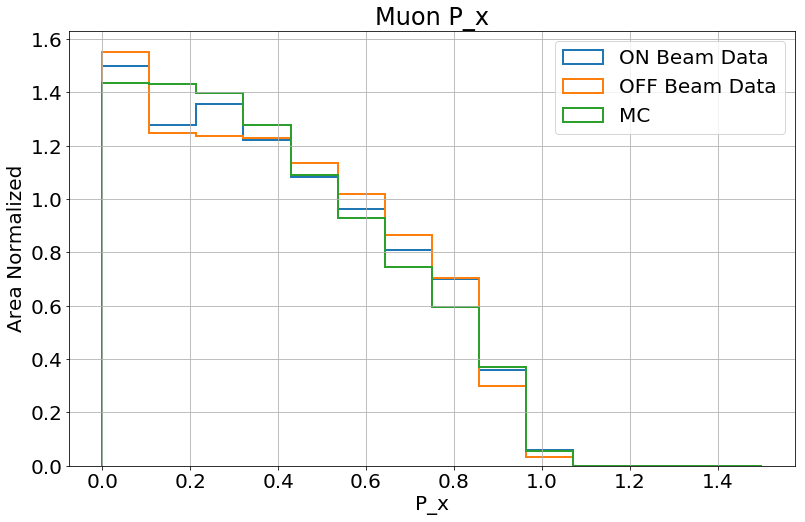

In [52]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,1.5,15)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['muon_px'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['muon_px'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['muon_px'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Muon P_x")
plt.xlabel('P_x')
plt.ylabel('Area Normalized')
plt.grid()
plt.show()

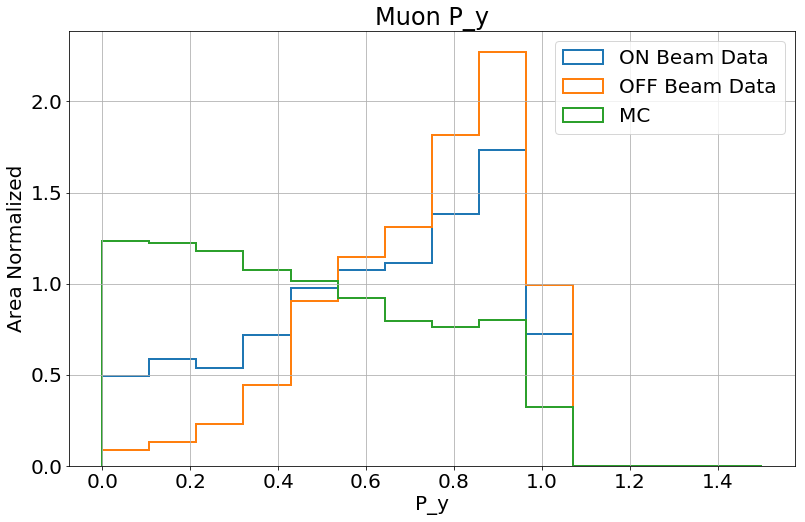

In [53]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,1.5,15)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['muon_py'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['muon_py'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['muon_py'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Muon P_y")
plt.xlabel('P_y')
plt.ylabel('Area Normalized')
plt.grid()

In [2]:
df_vertex_cut_beam_on_boundary_cut50= df_Event_beam_on.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_beam_off_boundary_cut50= df_Event_beam_off.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
df_vertex_cut_MC_boundary_cut50= df_Event_MC.query('Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and distance_smallest<1e10')
BINS = np.linspace(0,1.5,15)
fig = plt.figure(figsize=(13,8))
plt.hist(df_vertex_cut_beam_on_boundary_cut50['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_vertex_cut_beam_off_boundary_cut50['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_vertex_cut_MC_boundary_cut50['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='MC',density=True)
plt.legend(loc=1)
plt.title("Muon P_z")
plt.xlabel('P_z')
plt.ylabel('Area Normalized')
plt.grid()
plt.show()

NameError: name 'df_Event_beam_on' is not defined